In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("bank.csv")
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [9]:
dt=DecisionTreeClassifier()

In [10]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1165
           1       0.77      0.78      0.77      1068

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



DecisionTreeClassifier()

In [11]:
dt.score(xtrain,ytrain)

1.0

In [12]:
dt.score(xtest,ytest)

0.7828034034930587

In [13]:
dt.feature_importances_

array([0.08289495, 0.02740689, 0.01553858, 0.01529927, 0.00072508,
       0.08548501, 0.03834891, 0.00656924, 0.06113913, 0.07505429,
       0.10057565, 0.34997917, 0.02748532, 0.04725948, 0.02708306,
       0.03915598])

## hyperparameter tunning

In [14]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1165
           1       0.79      0.82      0.81      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(max_depth=10)

In [15]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7098074339453649
2: 0.7098074339453649
3: 0.7751903269144649
4: 0.7832512315270936
5: 0.8051948051948052
6: 0.8056426332288401
7: 0.8154948499776086
8: 0.8150470219435737
9: 0.8069861173309449
10: 0.8137035378414689
11: 0.8163905060456784
12: 0.8114643976712942
13: 0.8137035378414689
14: 0.8056426332288401
15: 0.8016121809225257
16: 0.7948947604120018
17: 0.7957904164800716
18: 0.7899686520376176
19: 0.7881773399014779
20: 0.7823555754590238
21: 0.7801164352888491
22: 0.7854903716972682
23: 0.7854903716972682
24: 0.7774294670846394
25: 0.7854903716972682
26: 0.7832512315270936
27: 0.7819077474249888
28: 0.7801164352888491
29: 0.780564263322884
30: 0.7850425436632333
31: 0.7823555754590238
32: 0.7863860277653381
33: 0.7845947156291984
34: 0.7792207792207793
35: 0.7913121361397224
36: 0.7792207792207793
37: 0.7863860277653381
38: 0.7886251679355127
39: 0.7814599193909538
40: 0.7854903716972682
41: 0.7845947156291984
42: 0.787281683833408
43: 0.781012091356919
44: 0.7783251231527094


In [15]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1165
           1       0.81      0.79      0.80      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(max_depth=8)

In [16]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1165
           1       0.81      0.80      0.81      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(min_samples_leaf=10)

In [17]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.781012091356919
2: 0.7747424988804299
3: 0.7828034034930587
4: 0.7886251679355127
5: 0.799820868786386
6: 0.8029556650246306
7: 0.8092252575011196
8: 0.812807881773399
9: 0.8186296462158531
10: 0.8132557098074339
11: 0.8222122704881325
12: 0.8266905508284819
13: 0.8262427227944469
14: 0.8217644424540976
15: 0.8231079265562025
16: 0.8226600985221675
17: 0.8302731751007613
18: 0.8334079713390058
19: 0.8351992834751455
20: 0.8338557993730408
21: 0.8343036274070756
22: 0.8334079713390058
23: 0.8298253470667264
24: 0.8316166592028661
25: 0.8289296909986565
26: 0.8280340349305867
27: 0.8262427227944469
28: 0.825794894760412
29: 0.8262427227944469
30: 0.8248992386923422
31: 0.8244514106583072
32: 0.8240035826242723
33: 0.825794894760412
34: 0.8231079265562025
35: 0.8213166144200627
36: 0.8208687863860278
37: 0.8163905060456784
38: 0.8163905060456784
39: 0.8199731303179579
40: 0.8199731303179579
41: 0.8199731303179579
42: 0.819525302283923
43: 0.819525302283923
44: 0.8208687863860278
45: 

In [18]:
dt5=DecisionTreeClassifier(min_samples_leaf=19)
mymodel(dt5)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1165
           1       0.82      0.84      0.83      1068

    accuracy                           0.84      2233
   macro avg       0.83      0.84      0.83      2233
weighted avg       0.84      0.84      0.84      2233



DecisionTreeClassifier(min_samples_leaf=19)

In [20]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=10)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1165
           1       0.81      0.80      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.81      0.82      2233
weighted avg       0.82      0.82      0.82      2233



DecisionTreeClassifier(min_samples_leaf=10)

In [22]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=19,max_depth=10)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1165
           1       0.80      0.78      0.79      1068

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



DecisionTreeClassifier(criterion='entropy')

In [28]:
dt10=DecisionTreeClassifier(max_depth=2)
mymodel(dt10)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1165
           1       0.66      0.81      0.73      1068

    accuracy                           0.71      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.71      0.71      2233



DecisionTreeClassifier(max_depth=2)

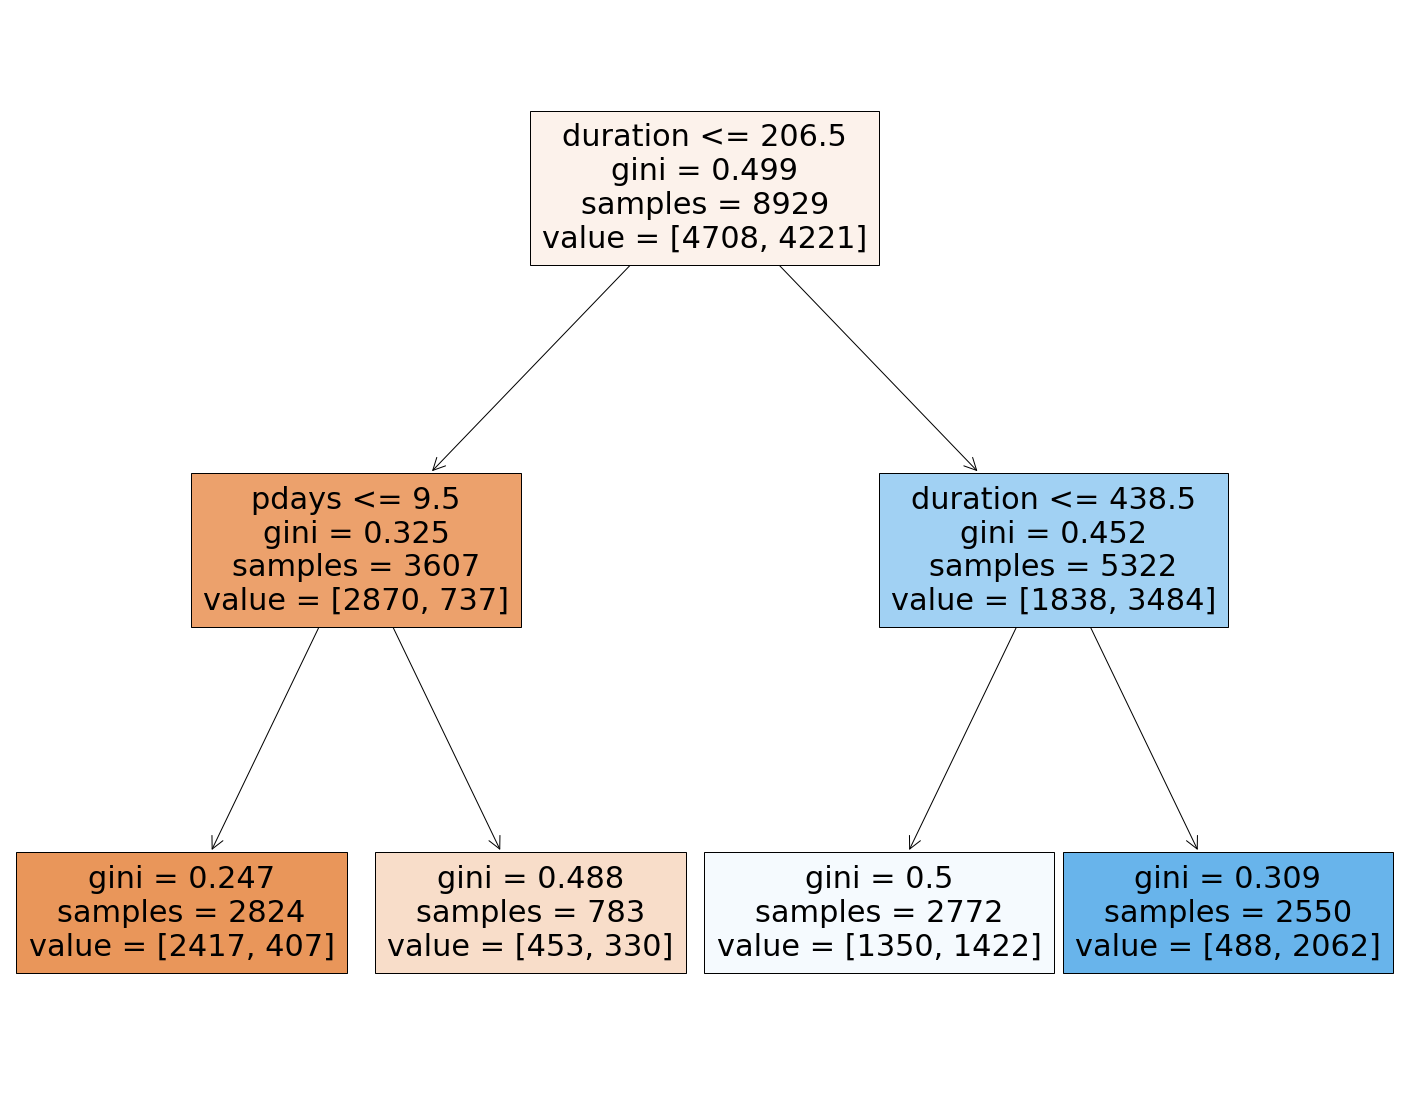

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t = tree.plot_tree(dt10,filled=True,feature_names=x.columns)

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 1, 10, 50, 100],
          'min_samples_leaf' : [1, 5, 10, 50, 100],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [30]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 50, 100]})

In [31]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 50}

In [32]:
my_best_preds = grid_search.predict(xtest)

In [33]:
accuracy_score(ytest, my_best_preds)

0.8222122704881325

In [34]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1165
           1       0.79      0.86      0.82      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.83      0.82      0.82      2233

